<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/M%C3%A9todo_de_composici%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO DE COMPOSICIÓN

Este método es adecuado para funciones que pueden divirse en sub-funciones con densidad conocida.

Sea la función $f(x)=e^{-2|x|}$ para $x \in \mathbb{R}$ . Note que $f(x)$ debe ser una función densidad:

*   Ya que $e^x > 0$ para todo $x$, se concluye que $f(x)$
*   $\int_{-\infty}^\infty e^{-2|x|}dx = 1$



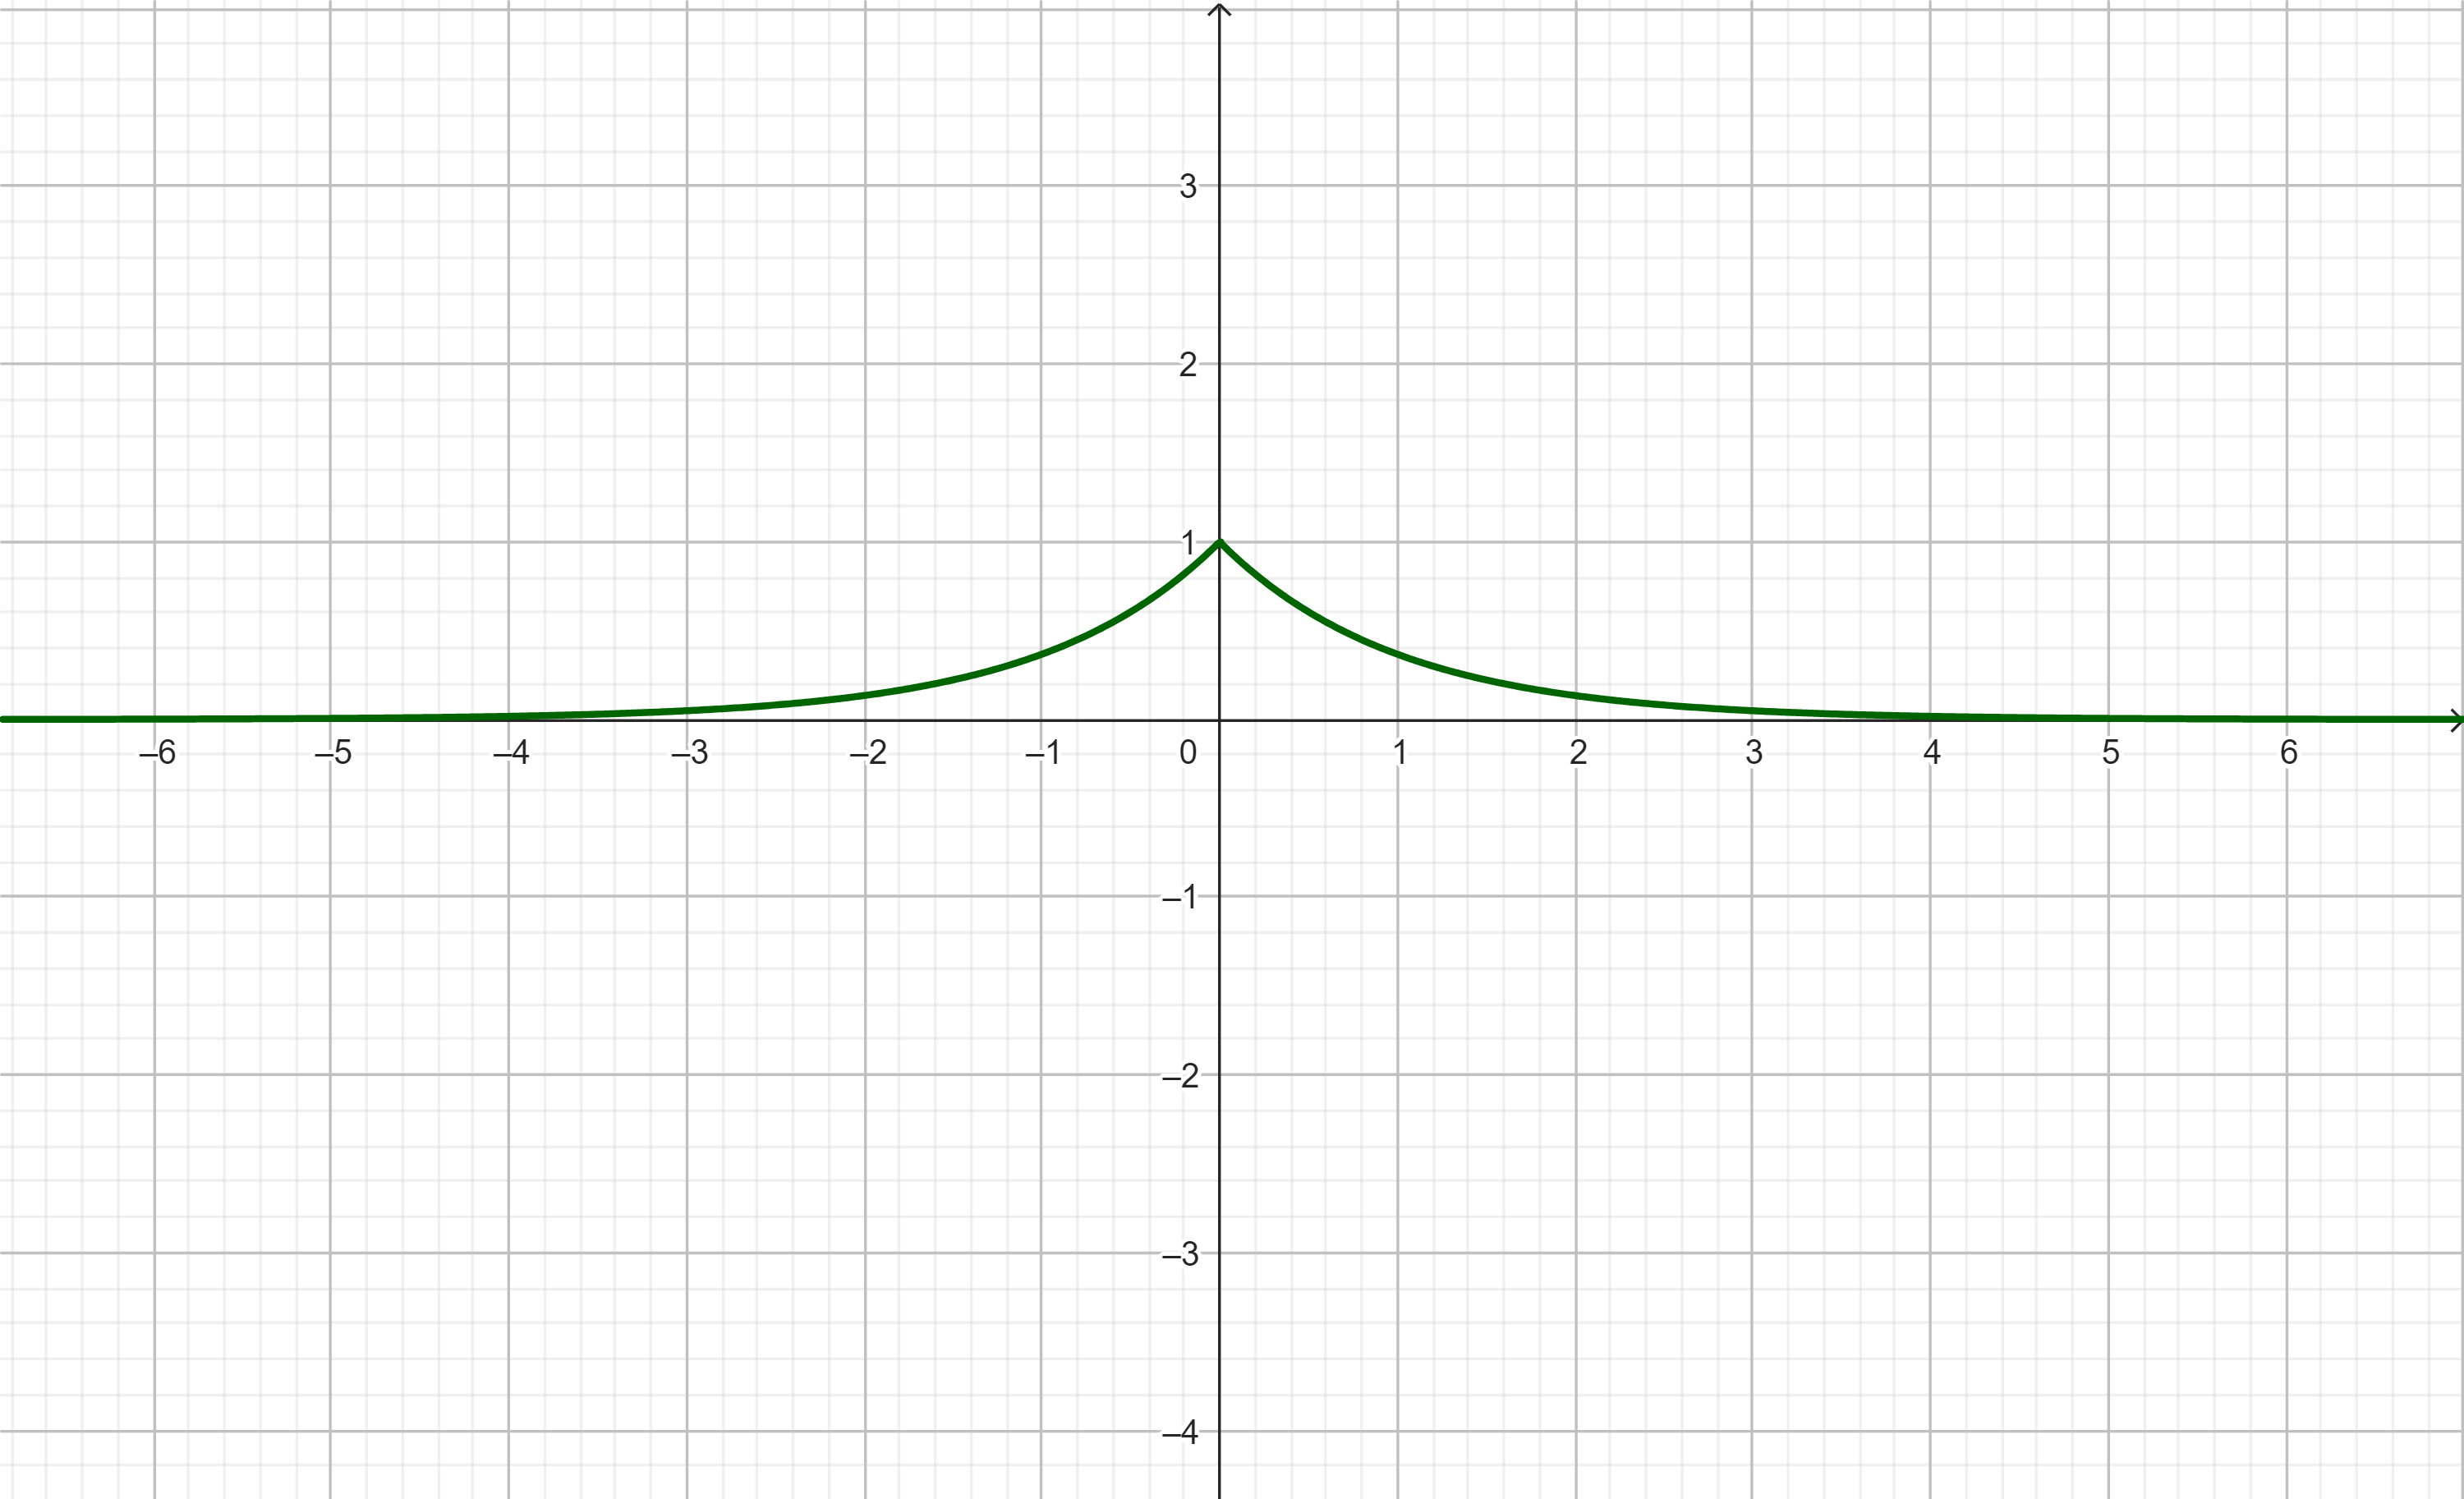

Esta función de densidad puede dividirse en dos sub-funciones, una del lado izquiero y otra del lado derecho:

$$f_1(x)= e^{-2|x|}\hspace{5mm} \text{para} \hspace{5mm} -\infty < x \leq 0$$

$$f_2(x)= e^{-2|x|}\hspace{5mm} \text{para} \hspace{5mm} 0 \leq x < \infty $$

Note que, aunque $f_1(x)$ y $f_2(x)$ parecen ser iguales, **NO LO SON**, pues ambas **están definidas en dominios diferentes**.

Posteriormente, se calculan las áreas debajo de ambas curvas:

$$A_1=\int_{-\infty}^0 e^{2x} dx=\frac{1}{2}$$

$$A_2=\int_{0}^\infty e^{-2x} dx=\frac{1}{2}$$

Ahora, se puede describir $f(x)$ de la siguiente manera: $\hspace{5mm} f(x)=A_1f_1(x)+A_2f_2(x)$



Luego, se calcula la función acumulada $F(x)$ y $F^{-1}(x)$

$$f_1(x) \rightarrow F_1(x)=\int_{\infty}^x f_1(s)ds=\int_{-\infty}^x e^{2s}ds=\frac{1}{2}e^{2x}$$

$$f_2(x) \rightarrow F_2(x)=\int_{0}^x f_2(s)ds=\int_{0}^x e^{-2s}ds=\frac{1}{2}(1-e^{-2x})$$

luego

$$F_1(x) \rightarrow F^{-1}_1(u)=\frac{ln(2u)}{2}$$

$$F_2(x) \rightarrow F^{-1}_2(u)=-\frac{ln(1-2u)}{2}$$

Para este método, es necesario generar dos variables aleatorias $u_1, u_2 \sim U(0,1)$ .

$u_1$ determinará cuál función inversa se utilizará, lo hara de la siguiente forma:

*   Si $u_1 \in [0,A_1]$ , usar $F^{-1}_1(u_2)$
*   Si $u_1 \notin [0,A_1]$ , usar $F^{-1}_2(u_2)$



# SIMULACIÓN

In [24]:
#Se cargan las librerías
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def composicion (n):          #Esta función devuelve una lista con las variables aleatorias
  lista=[]                    #   que siguen la distribución f(x)
  for i in range(n):
    u1=rnd.random()            # Primer variable aleatoria u ~ U(0,1)
    u2=rnd.random()            # Segunda variable aleatoria u ~ U(0,1)
    if u1<0.5:                # El condicional determina que F^-1(u2) se calcula
      x=np.log(2*u2)/2
    elif u1>0.5:
      x=-np.log(1-2*u2)/2
    lista.append(x)           #Se guardan los valores de X ~ f(x)
  return lista

<ipython-input-31-12b9a0bac0db>:9: RuntimeWarning: invalid value encountered in log
  x=-np.log(1-2*u2)/2


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 5.0000e+00, 4.0000e+00, 2.0000e+00, 8.0000e+00,
        4.0000e+00, 1.1000e+01, 1.4000e+01, 1.0000e+01, 2.0000e+01,
        2.4000e+01, 2.4000e+01, 3.4000e+01, 4.2000e+01, 4.8000e+01,
        5.6000e+01, 8.3000e+01, 1.0300e+02, 1.2500e+02, 1.2700e+02,
        1.6900e+02, 2.0900e+02, 2.4400e+02, 3.1200e+02, 3.6700e+02,
        4.1300e+02, 5.4500e+02, 6.7300e+02, 8.1500e+02, 1.0120e+03,
        1.3160e+03, 1.5740e+03, 1.8890e+03, 2.2360e+03, 2.9530e+03,
        3.5560e+03, 4.3810e+03, 8.7420e+03, 1.0585e+04, 1.1444e+04,
        9.0380e+03, 2.1990e+03, 1.7630e+03, 1.4800e+03, 1.1700e+03,
        9.8400e+02, 7.6400e+02, 5.9500e+02, 4.9400e+02, 4.0700e+02,
        3.2000e+02, 2.6000e+02, 2.2400e+02, 2.0400e+02, 1.4000e+02,
        1.5100e+02, 1.1100e+02, 8.1000e+01, 6.8000e+01, 5.2000e+01,
        4.4000e+01, 3.0000e+01, 2.5000e+01, 2.20

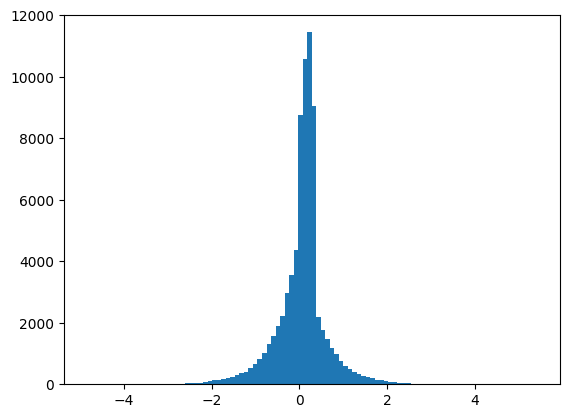

In [37]:
e=composicion(100000)           #Se calculan n varibles con distribución f(x)
plt.hist(e, bins=100)          #Imprime histograma

In [34]:
def acumulativa (muestra):        #Esta función devuelve las coordenadas para graficar F^-1 (x)
  n=len(muestra)
  x=np.sort(muestra)
  y=np.arange(0,n)/n
  return x,y

Text(0, 0.5, 'F(x)')

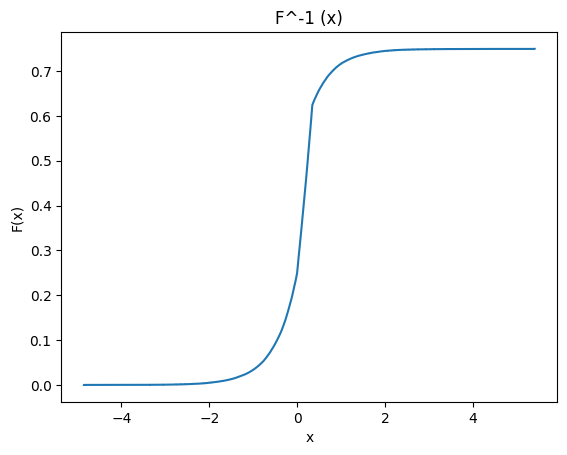

In [38]:
X,Y=acumulativa(e)                #Se imprime F^-1{x}
plt.step(X,Y)
plt.title('F^-1 (x)')
plt.xlabel("x")
plt.ylabel("F(x)")